In [1]:
# Python version: 3.7.1
# pandas version: 1.2.3
# matplotlib version: 3.1.0
# NumPy version: 1.19.5
# SciPy version: 1.6.2
# IPython version: 7.22.0
# scikit-learn version: 0.24.1

In [2]:
import sys
import time
import random
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import IPython
from IPython import display
import warnings
warnings.filterwarnings('ignore')

In [30]:
# General Feature Supporter
from sklearn import metrics
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Display
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

# General Model Algorithms
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import discriminant_analysis, svm, naive_bayes, tree, linear_model, neighbors, ensemble 

# Display Settings 
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 17,6

In [4]:
### import our data
data = pd.read_csv('dataanalytics-class-data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   ID                                                                           151 non-null    int64  
 1   Start time                                                                   151 non-null    object 
 2   Completion time                                                              151 non-null    object 
 3   Gender                                                                       151 non-null    object 
 4   Age                                                                          151 non-null    object 
 5   Closest biggest city near you                                                151 non-null    object 
 6   Number of kids (<18y) living with you     

In [5]:
data.head()

,ID,Start time,Completion time,Gender,Age,Closest biggest city near you,Number of kids (<18y) living with you,Birth Year,Number of modules completed so far,Average mark so far2,Prediction for this module's mark,I enjoy working with data,I am excited about working with data,I am afraid of working with data,I am interested in understanding Data Analytics,I plan to work hard in this module,"Height (absolute value, in centimeters (cm) - sorry imperial system users!)",Height (relative)
0,2,12/17/20 9:09:33,12/17/20 9:10:55,Woman,40-49,Lagos,0,1975,5,62.0,62,Agree,Agree,Completely Disagree,Agree,Agree,175.0,very tall
1,3,12/17/20 9:09:27,12/17/20 9:11:01,Man,30-39,Dhaka,0,1011986,5,57.0,65,Agree,Agree,Completely Disagree,Agree,Agree,172.0,average
2,4,12/17/20 9:09:34,12/17/20 9:14:39,Man,30-39,Hanoi,0,1989,5,61.0,64,Agree,Meh,Disagree,Meh,Meh,178.0,average
3,5,12/17/20 9:19:54,12/17/20 9:27:03,Woman,50-59,Stockholm,0,1970,5,60.0,100,Agree,Agree,Completely Disagree,Agree,Completely Agree,164.0,average
4,6,12/17/20 9:28:13,12/17/20 9:35:44,Man,40-49,Accra,3,1979,5,60.0,70,Completely Agree,Agree,Completely Disagree,Completely Agree,Meh,170.0,average


In [6]:
data.describe(include = 'all')

,ID,Start time,Completion time,Gender,Age,Closest biggest city near you,Number of kids (<18y) living with you,Birth Year,Number of modules completed so far,Average mark so far2,Prediction for this module's mark,I enjoy working with data,I am excited about working with data,I am afraid of working with data,I am interested in understanding Data Analytics,I plan to work hard in this module,"Height (absolute value, in centimeters (cm) - sorry imperial system users!)",Height (relative)
count,151.000000,151,151,151,151,151,151.000000,1.510000e+02,151,144.000000,151.000000,151,151,151,151,151,151.000000,151
unique,NaN,151,151,2,6,104,NaN,NaN,6,NaN,NaN,4,5,5,4,4,NaN,5
top,NaN,1/16/21 21:03:37,12/17/20 18:23:26,Man,40-49,Zurich,NaN,NaN,5,NaN,NaN,Agree,Agree,Disagree,Completely Agree,Completely Agree,NaN,average
freq,NaN,1,1,90,56,6,NaN,NaN,77,NaN,NaN,74,67,59,93,93,NaN,74
mean,77.874172,NaN,NaN,NaN,NaN,NaN,1.026490,1.480457e+05,NaN,60.967014,66.701987,NaN,NaN,NaN,NaN,NaN,167.268808,NaN
std,43.926045,NaN,NaN,NaN,NaN,NaN,1.165887,1.315952e+06,NaN,14.001866,12.337906,NaN,NaN,NaN,NaN,NaN,117.890168,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2.600000e+01,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.400000,NaN
25%,40.500000,NaN,NaN,NaN,NaN,NaN,0.000000,1.972000e+03,NaN,59.875000,60.000000,NaN,NaN,NaN,NaN,NaN,160.780000,NaN
50%,78.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.979000e+03,NaN,63.000000,68.000000,NaN,NaN,NaN,NaN,NaN,170.000000,NaN
75%,115.500000,NaN,NaN,NaN,NaN,NaN,2.000000,1.986000e+03,NaN,67.000000,70.000000,NaN,NaN,NaN,NaN,NaN,178.000000,NaN


In [7]:
print('Data columns with null values:')
data.isnull().sum()

Data columns with null values:


ID                                                                             0
Start time                                                                     0
Completion time                                                                0
Gender                                                                         0
Age                                                                            0
Closest biggest city near you                                                  0
Number of kids (<18y) living with you                                          0
Birth Year                                                                     0
Number of modules completed so far                                             0
Average mark so far2                                                           7
Prediction for this module's mark                                              0
I enjoy working with data                                                      0
I am excited about working w

In [8]:
###Completing: add or remove missing values in dataset
# add median to null value
data['Average mark so far2'] = data['Average mark so far2'].fillna(0)

# replace value other than int i.e some value are none
data['Number of modules completed so far'] = pd.to_numeric(data['Number of modules completed so far'], errors='coerce').fillna(0)

In [9]:
###Creating: Feature Engineering for data
# replace woman and man to 0 and 1
data['Gender'].replace(['Woman','Man'], [0,1],inplace=True)

# renaming this column because it has < symbol which is not good for Machine learning model input
data.rename(columns={'Number of kids (<18y) living with you':'Number of kids (less than 18y) living with you'}, inplace=True)

# replace birth year having length character other than 4 i.e 11011991 should be 1991
for index, row in data.iterrows():
    if len(str(row['Birth Year'])) > 4:
        data['Birth Year'][index] = str(row['Birth Year'])[-4:]

In [10]:
# Convert to Int
data['Gender'] =  data['Gender'].astype(int)
data['Birth Year'] =  data['Birth Year'].astype(int)
data['Number of modules completed so far'] =  data['Number of modules completed so far'].astype(int)

In [11]:
###Converting: utilizing the Label Encoder for data, transform objects to categories from object to int.
label = LabelEncoder()
data['Age'] = label.fit_transform(data['Age'])
data['Height (relative)'] = label.fit_transform(data['Height (relative)'])
data['I enjoy working with data'] = label.fit_transform(data['I enjoy working with data'])
data['Closest biggest city near you'] = label.fit_transform(data['Closest biggest city near you'])
data['I am afraid of working with data'] = label.fit_transform(data['I am afraid of working with data'])
data['I plan to work hard in this module'] = label.fit_transform(data['I plan to work hard in this module'])
data['I am excited about working with data'] = label.fit_transform(data['I am excited about working with data'])
data['I am interested in understanding Data Analytics'] = label.fit_transform(data['I am interested in understanding Data Analytics'])

In [12]:
# Drop unused columns
data = data.drop(['ID', 'Start time', 'Completion time'], axis=1)

In [13]:
# Recheck to see if everything is cleaned
print('Data columns with null values: \n', data.isnull().sum())
print("-"*120)
print (data.info())
print("-"*120)
data.describe(include = 'all')

Data columns with null values: 
 Gender                                                                         0
Age                                                                            0
Closest biggest city near you                                                  0
Number of kids (less than 18y) living with you                                 0
Birth Year                                                                     0
Number of modules completed so far                                             0
Average mark so far2                                                           0
Prediction for this module's mark                                              0
I enjoy working with data                                                      0
I am excited about working with data                                           0
I am afraid of working with data                                               0
I am interested in understanding Data Analytics                             

,Gender,Age,Closest biggest city near you,Number of kids (less than 18y) living with you,Birth Year,Number of modules completed so far,Average mark so far2,Prediction for this module's mark,I enjoy working with data,I am excited about working with data,I am afraid of working with data,I am interested in understanding Data Analytics,I plan to work hard in this module,"Height (absolute value, in centimeters (cm) - sorry imperial system users!)",Height (relative)
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.596026,1.701987,52.423841,1.026490,1952.980132,3.622517,58.140728,66.701987,0.721854,1.026490,2.370861,0.768212,0.768212,167.268808,0.900662
std,0.492325,0.978398,30.069350,1.165887,222.108096,1.627848,18.770213,12.337906,0.910377,1.351281,1.055878,0.687447,0.687447,117.890168,0.978127
min,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,1972.000000,2.000000,58.000000,60.000000,0.000000,0.000000,2.000000,0.000000,0.000000,160.780000,0.000000
50%,1.000000,2.000000,53.000000,1.000000,1978.000000,5.000000,62.000000,68.000000,1.000000,1.000000,2.000000,1.000000,1.000000,170.000000,1.000000
75%,1.000000,2.000000,79.500000,2.000000,1985.500000,5.000000,67.000000,70.000000,1.000000,1.000000,3.000000,1.000000,1.000000,178.000000,2.000000
max,1.000000,5.000000,103.000000,5.000000,1998.000000,5.000000,120.000000,100.000000,3.000000,4.000000,4.000000,3.000000,3.000000,1500.000000,4.000000


In [14]:
### Split dataset into training and testing
X = data.drop(['Gender'], axis=1)
y = data['Gender']
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Shape: {}".format(x_train.shape))
print("Test Shape: {}".format(x_test.shape))

Train Shape: (120, 14)
Test Shape: (31, 14)


In [15]:
### Correlation Variable by Gender using group by
for col_name in x_train.columns:
    print('Gender Correlation by:', col_name)
    print(data[[col_name, 'Gender']].groupby(col_name, as_index=False).mean())
    print('-'*10, '\n')

Gender Correlation by: Age
   Age    Gender
0    0  0.500000
1    1  0.687500
2    2  0.571429
3    3  0.535714
4    4  0.500000
5    5  1.000000
---------- 

Gender Correlation by: Closest biggest city near you
     Closest biggest city near you    Gender
0                                0  0.666667
1                                1  1.000000
2                                2  0.666667
3                                3  0.000000
4                                4  0.500000
..                             ...       ...
99                              99  1.000000
100                            100  1.000000
101                            101  1.000000
102                            102  0.000000
103                            103  1.000000

[104 rows x 2 columns]
---------- 

Gender Correlation by: Number of kids (less than 18y) living with you
   Number of kids (less than 18y) living with you    Gender
0                                               0  0.560606
1                    

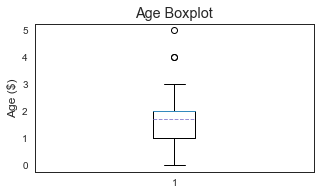

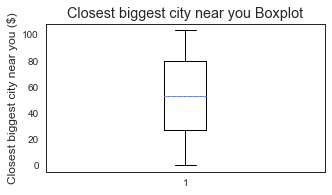

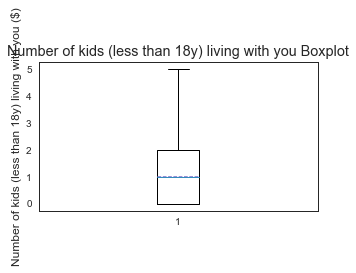

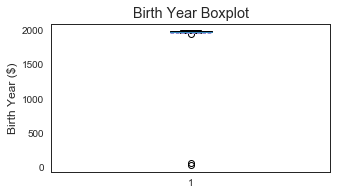

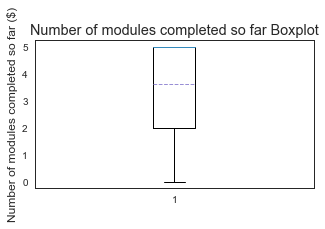

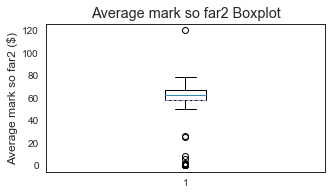

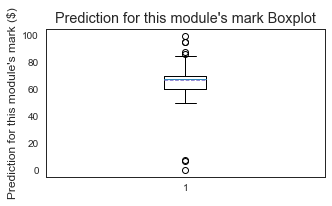

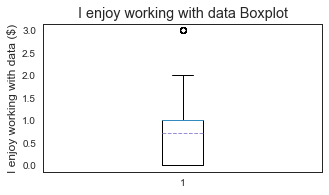

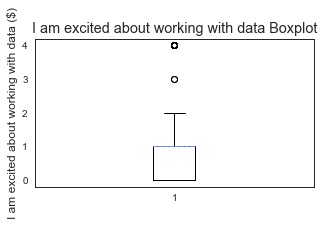

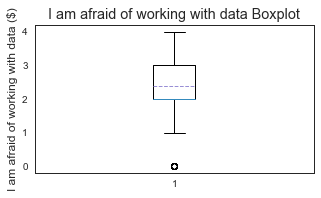

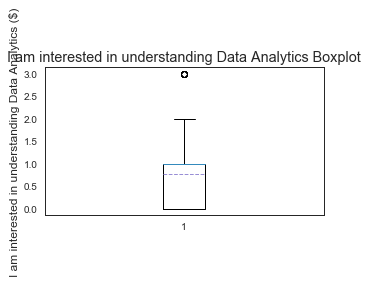

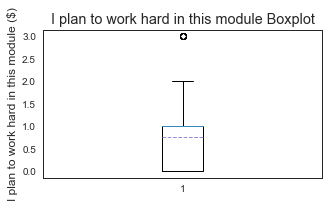

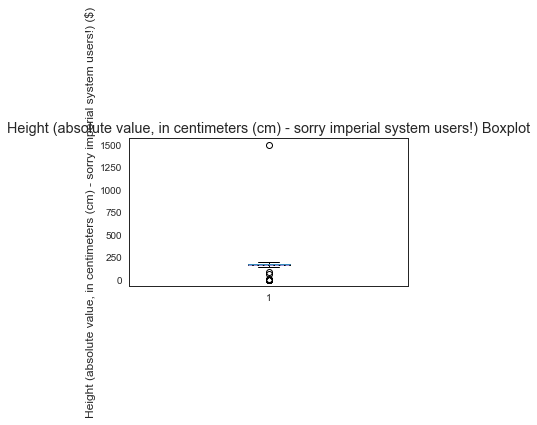

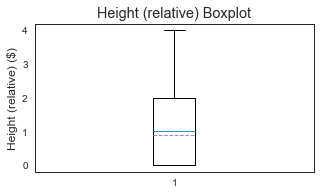

In [16]:
# Quantitative data graphical distribution
for col_name in x_train.columns:
    plt.subplot(232)
    plt.boxplot(x=data[col_name], showmeans = True, meanline = True)
    plt.title(col_name+' Boxplot')
    plt.ylabel(col_name+' ($)')
    time.sleep(0.1)
    plt.pause(0.0001) 

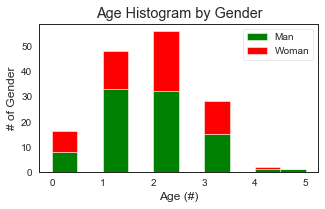

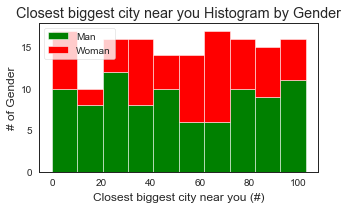

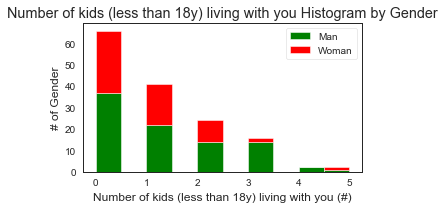

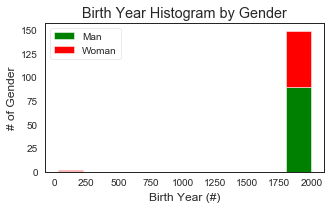

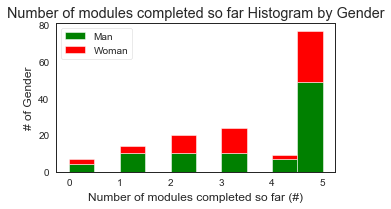

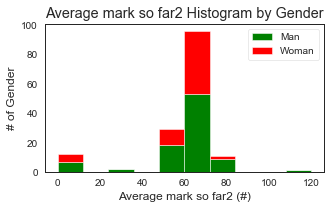

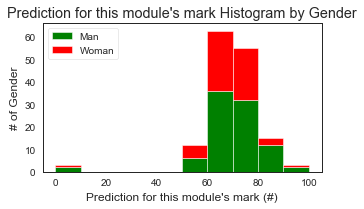

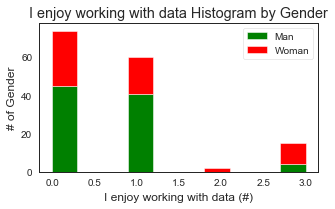

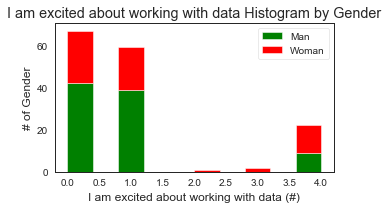

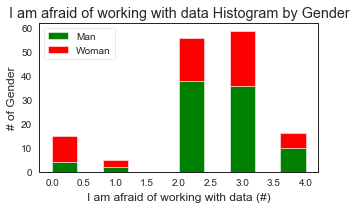

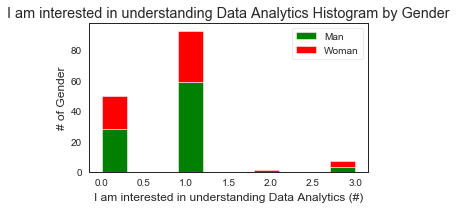

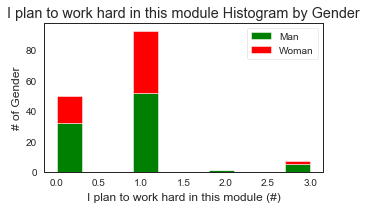

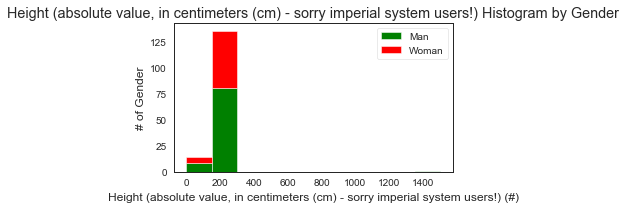

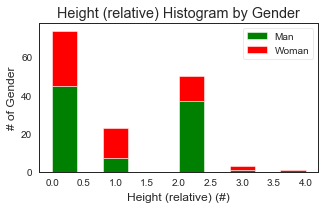

In [17]:
for col_name in x_train.columns:
    plt.subplot(236)
    plt.hist(x = [data[data['Gender']==1][col_name], data[data['Gender']==0][col_name]], 
             stacked=True, color = ['g','r'],label = ['Man','Woman'])
    plt.title(col_name+' Histogram by Gender')
    plt.xlabel(col_name+' (#)')
    plt.ylabel('# of Gender')
    plt.legend()
    time.sleep(0.1)
    plt.pause(0.0001) 

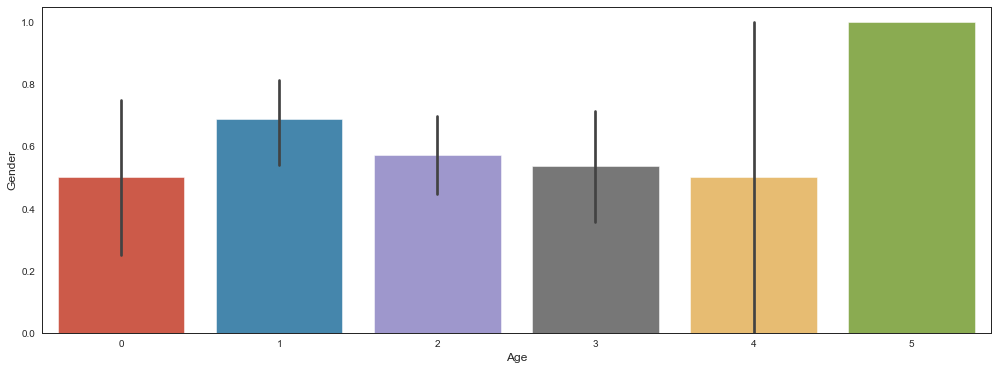

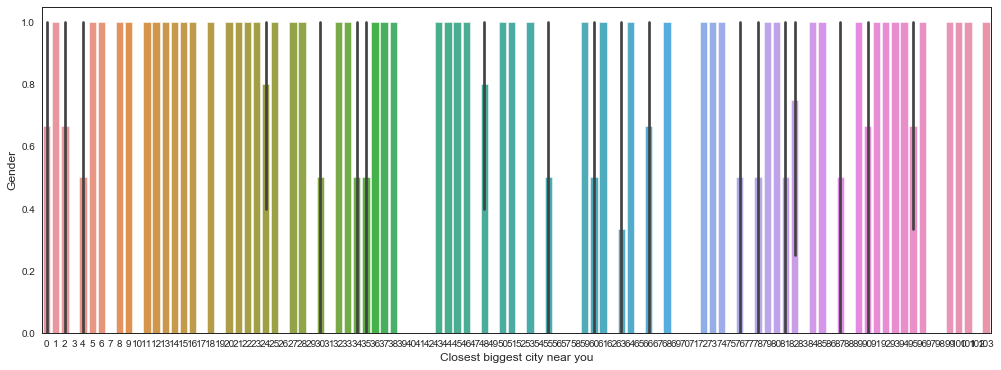

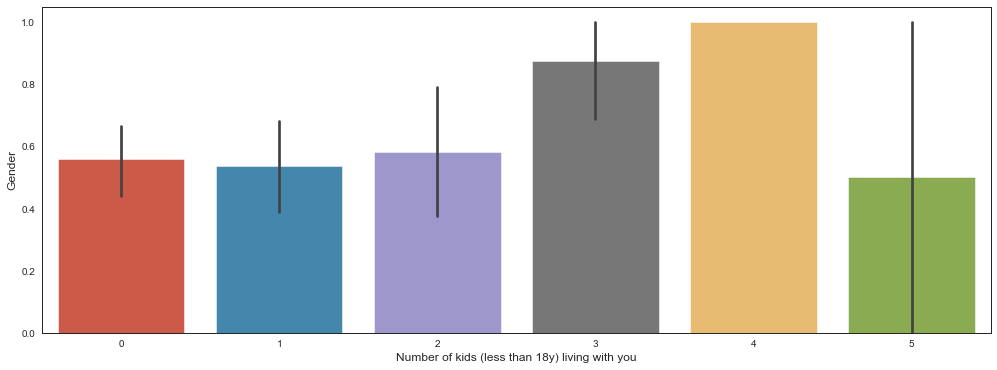

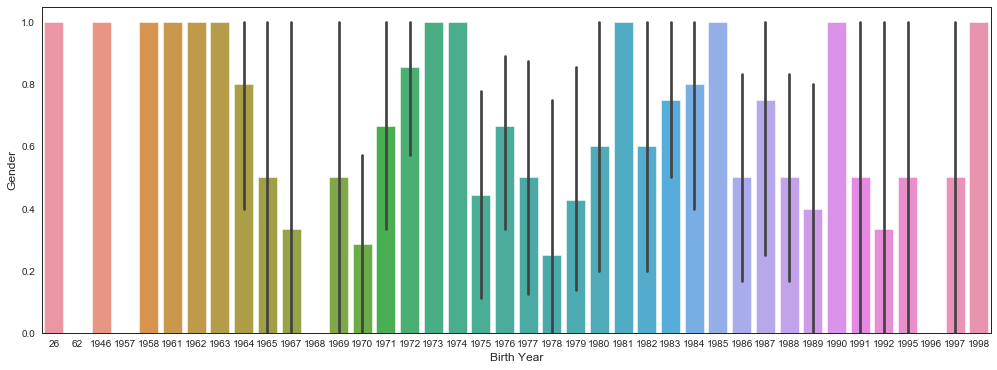

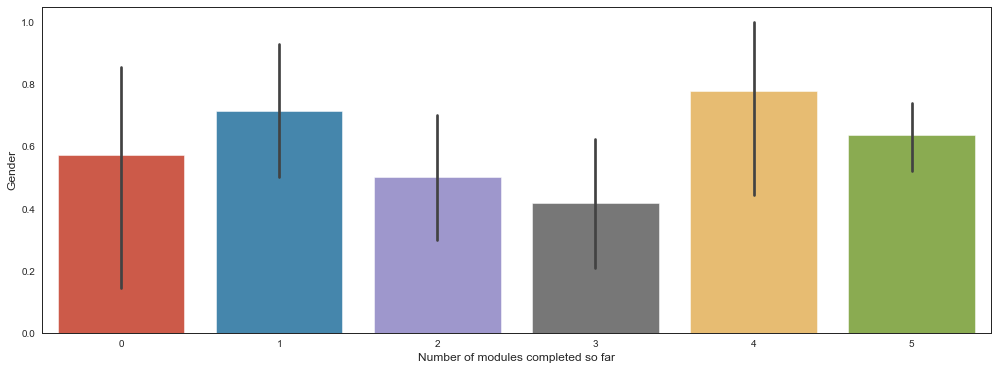

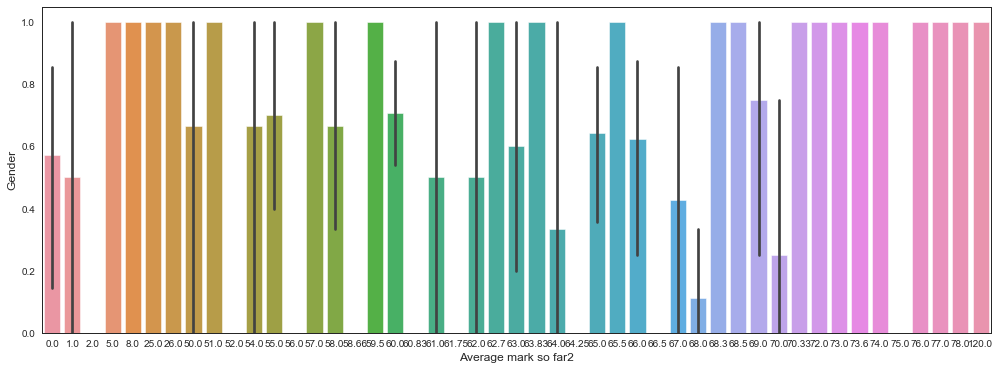

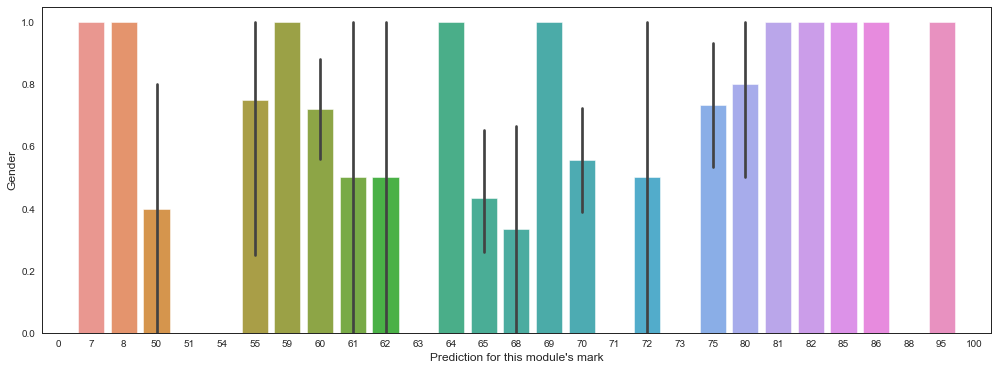

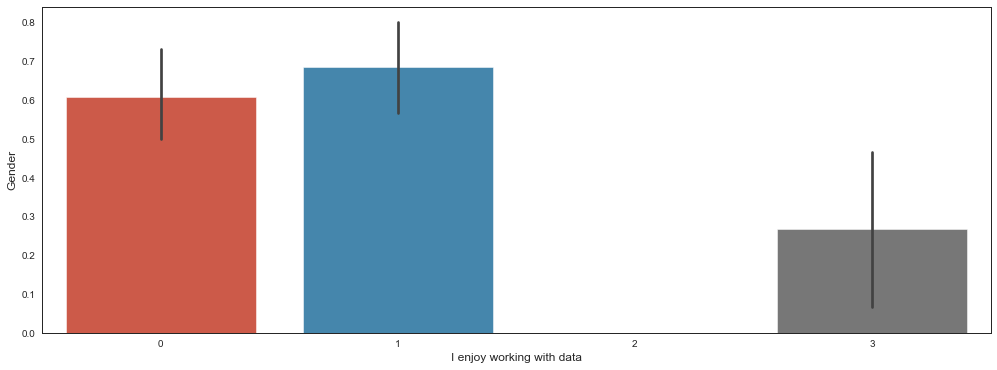

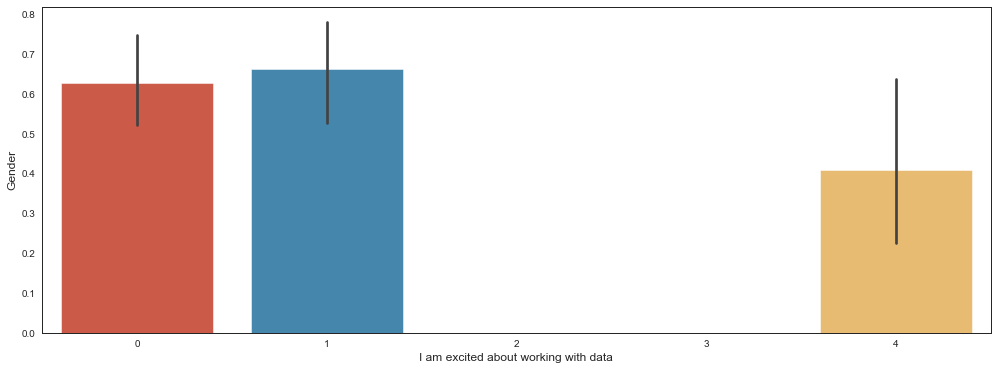

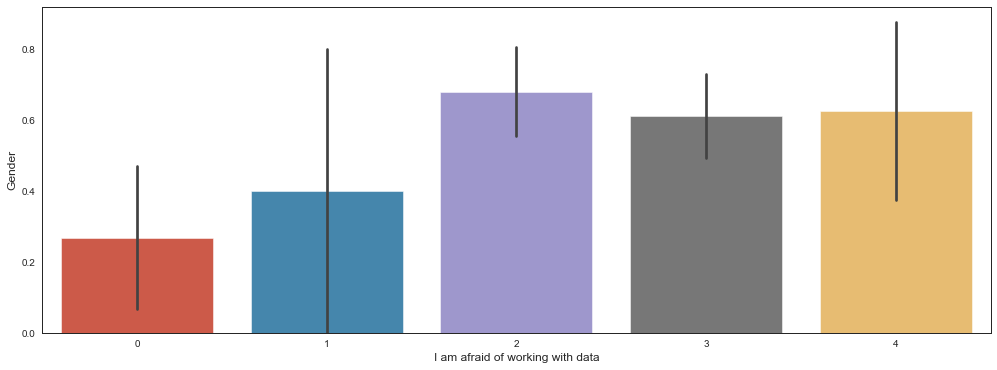

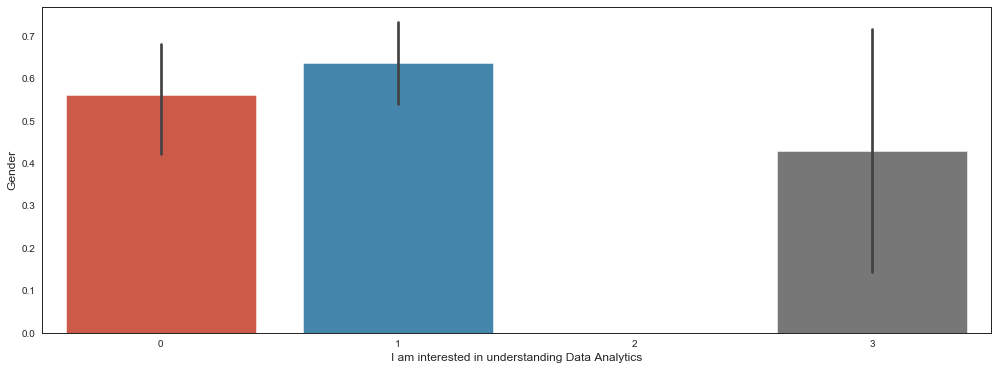

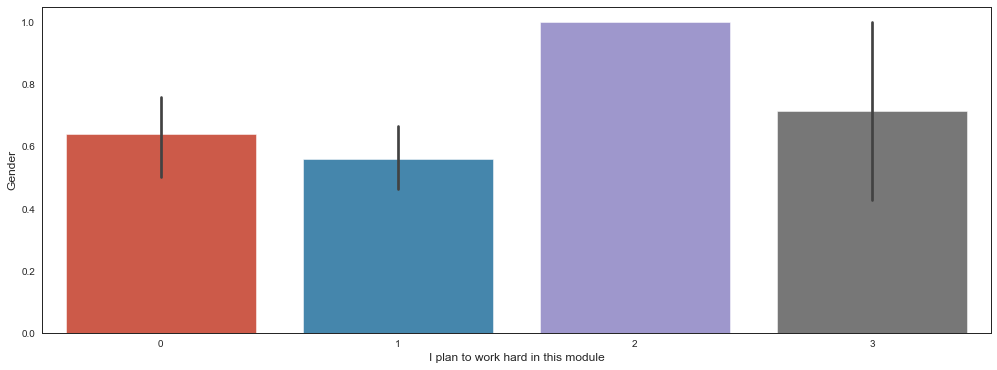

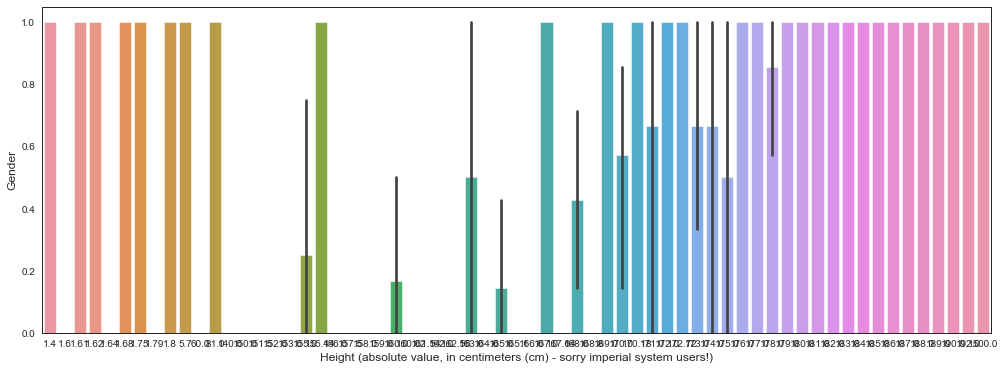

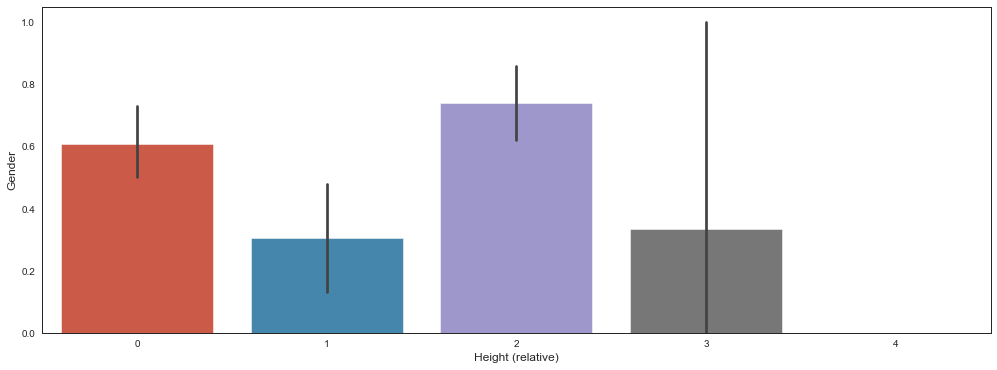

In [18]:
for index, col_name in enumerate(x_train.columns):
    plt.figure(index)
    sns.barplot(x = col_name, y = 'Gender', data=data)

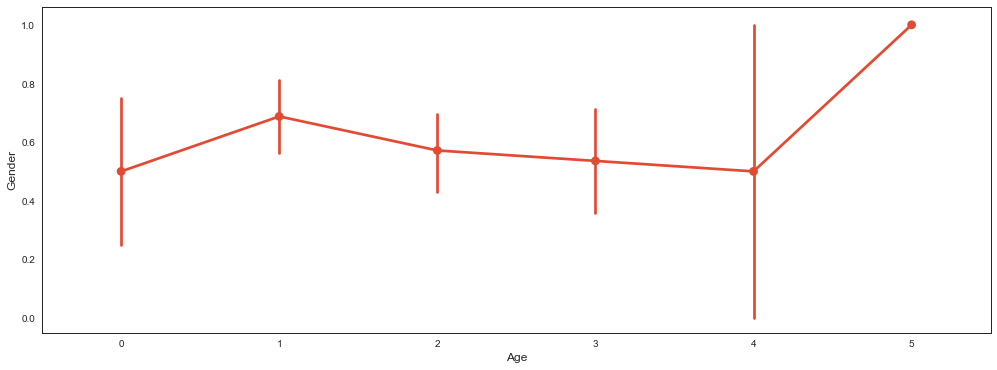

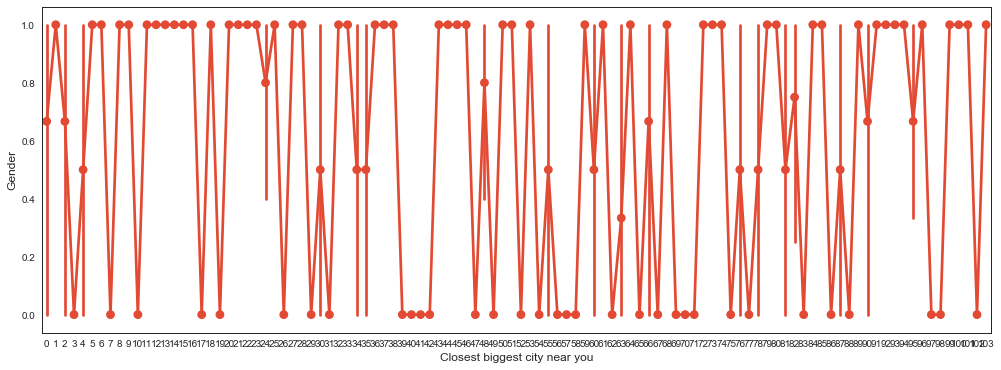

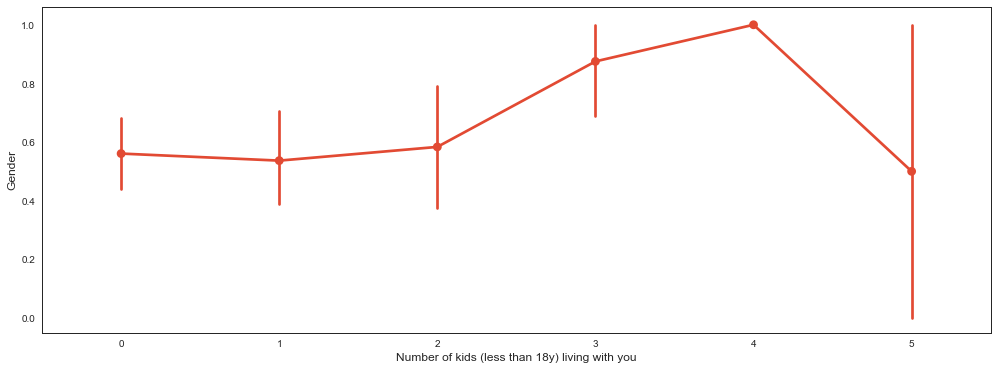

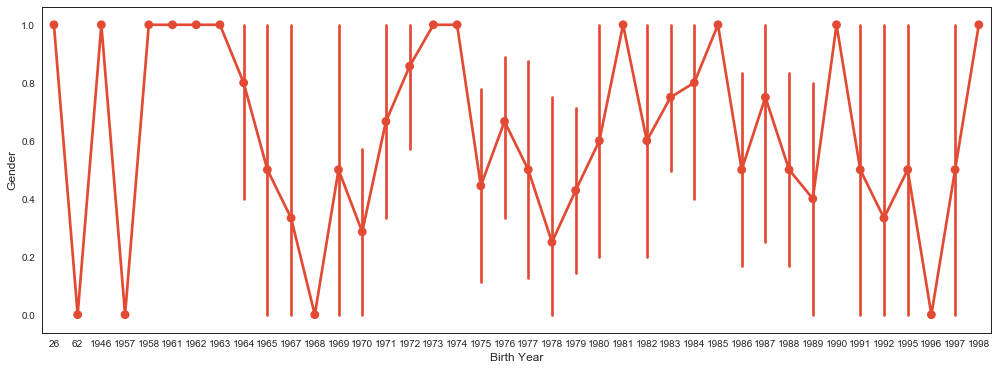

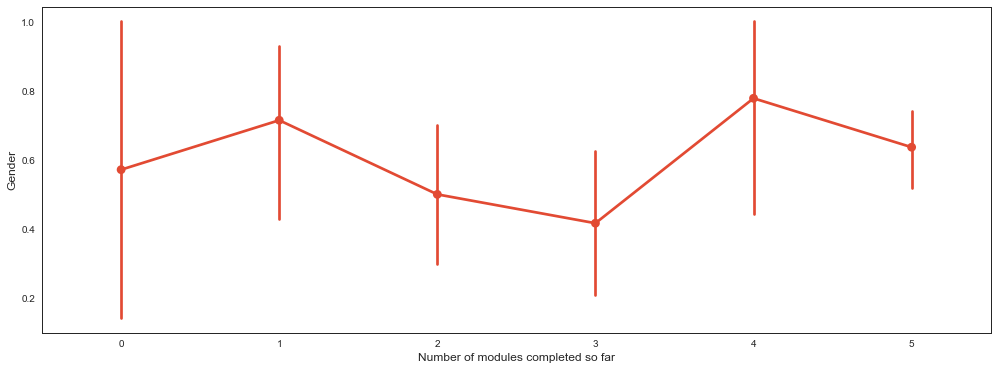

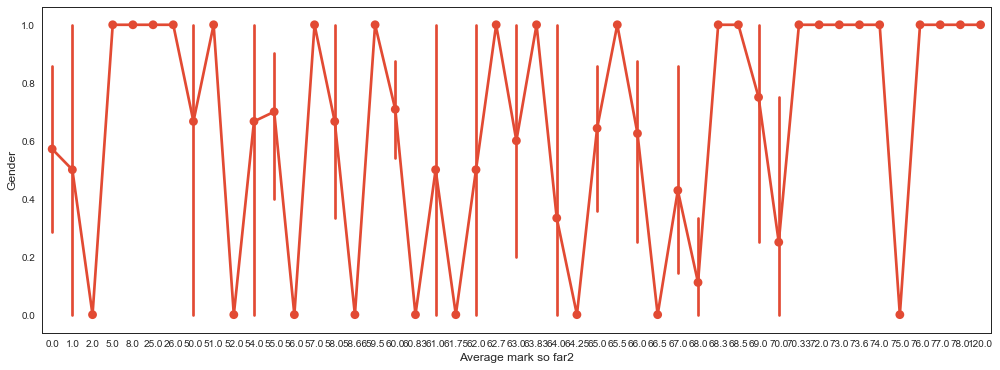

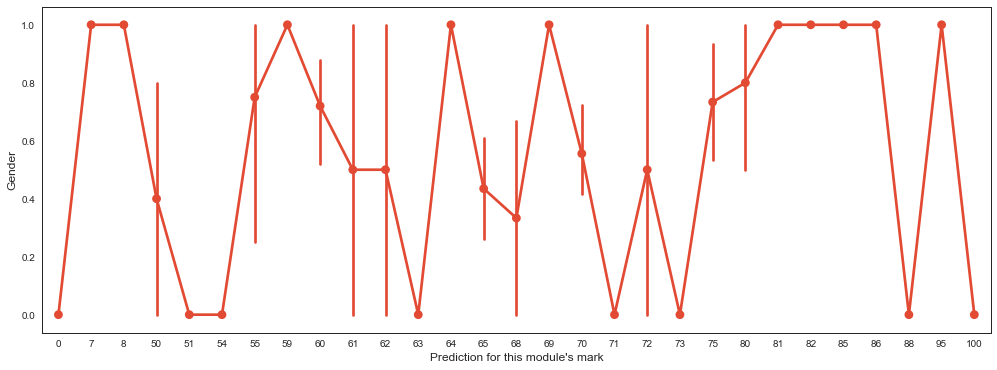

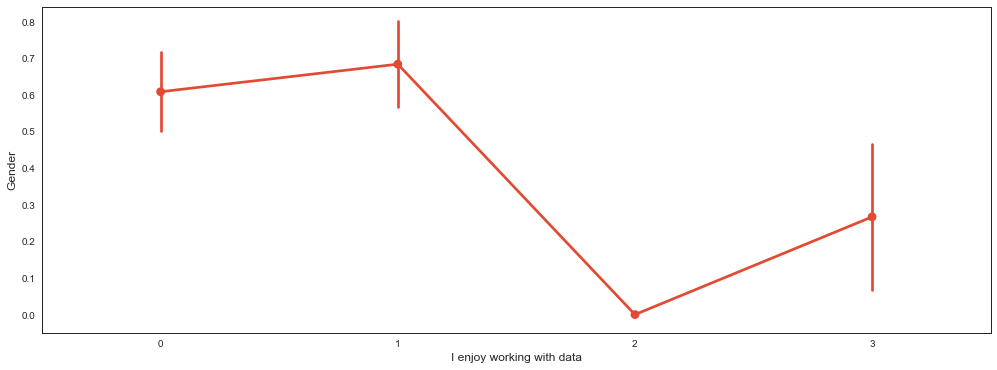

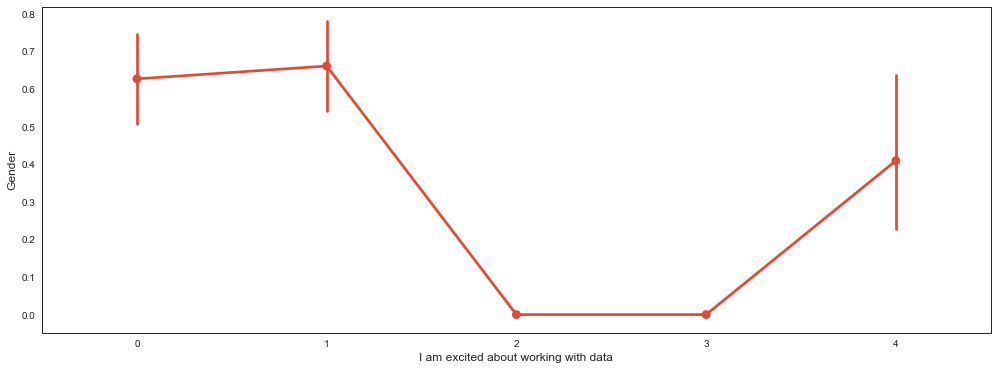

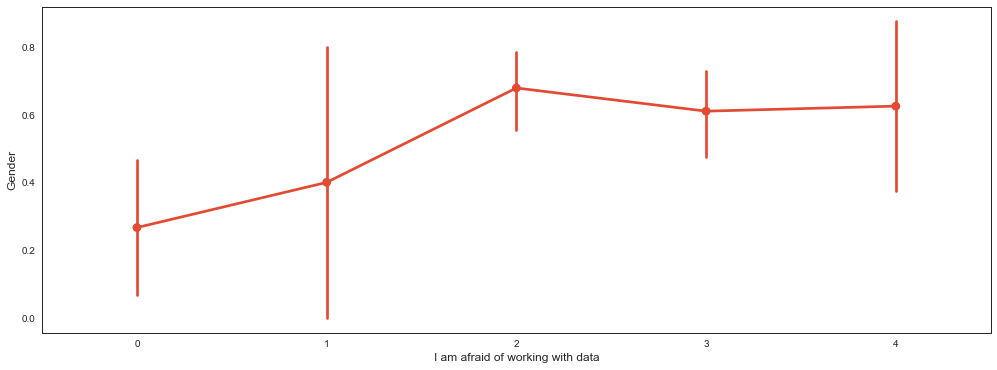

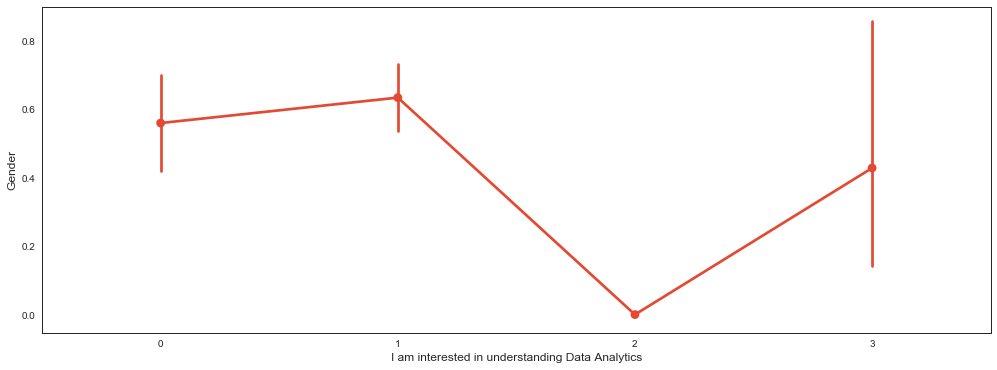

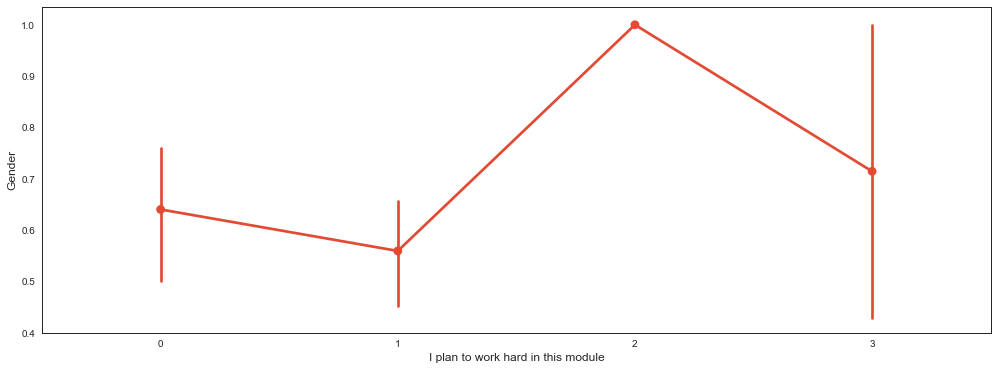

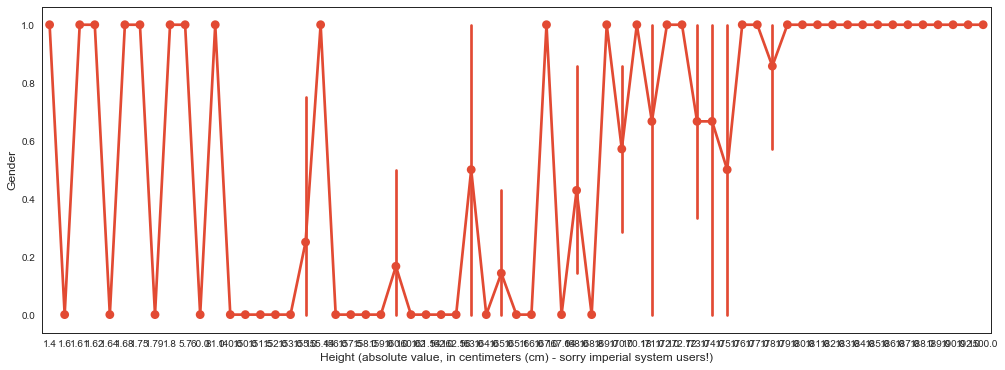

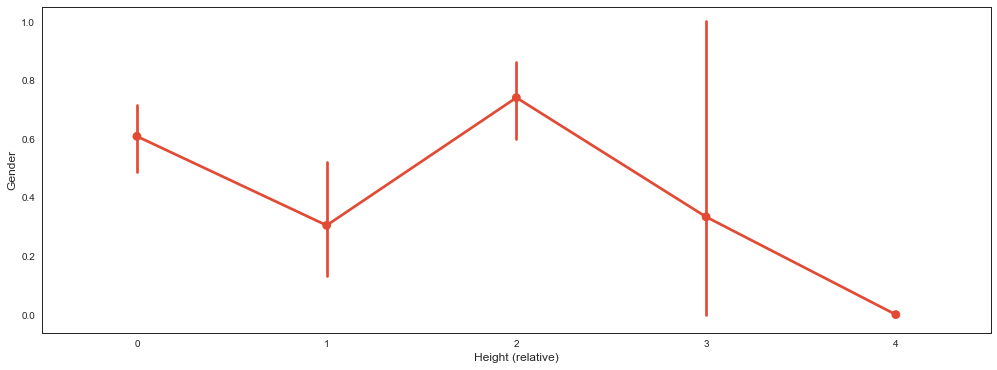

In [19]:
for index, col_name in enumerate(x_train.columns):
    plt.figure(index)
    sns.pointplot(x = col_name, y = 'Gender', data=data)

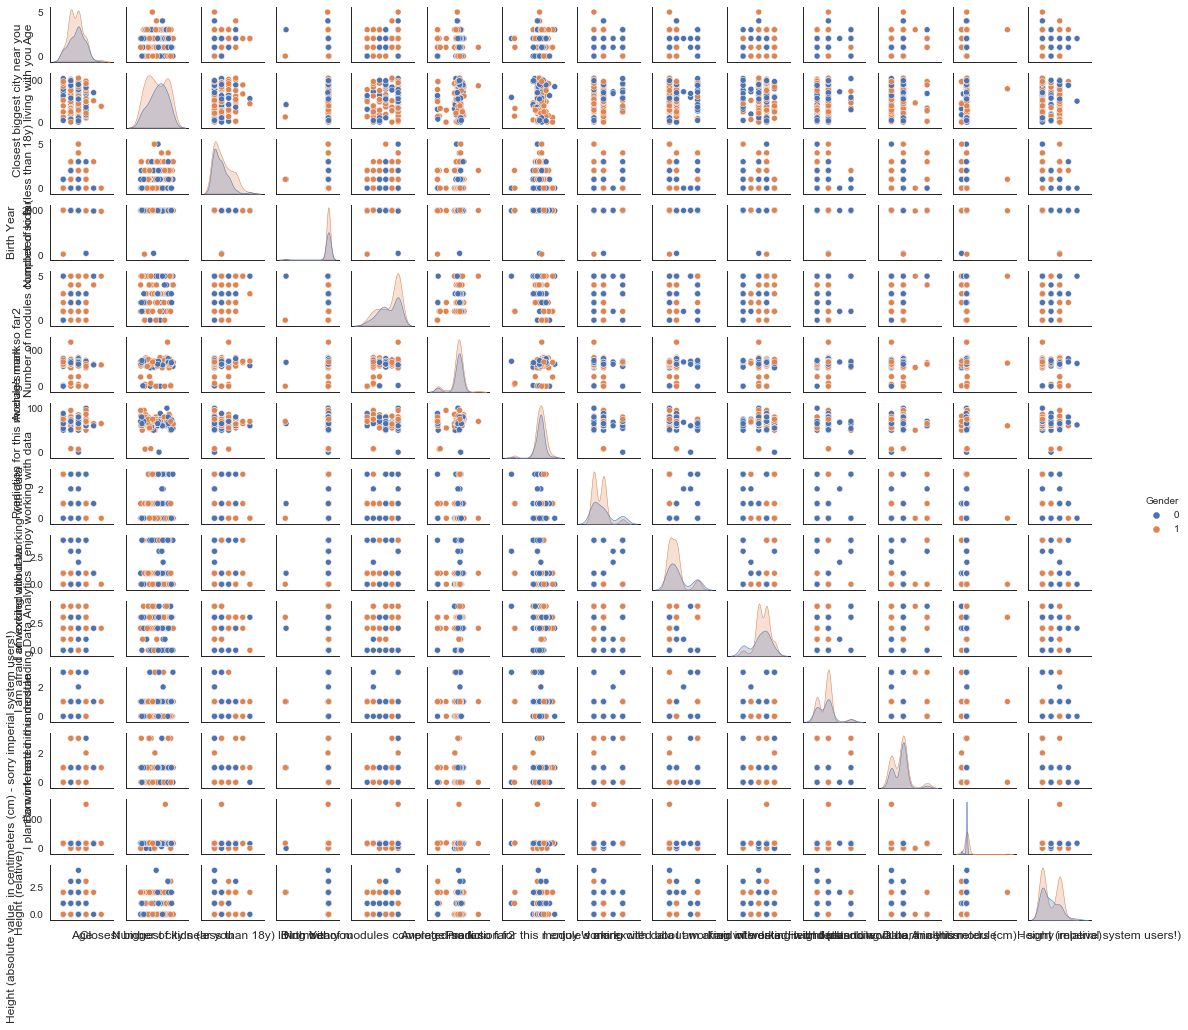

In [20]:
# we will pair plots the whole dataset
sns.pairplot(data, hue = 'Gender', palette = 'deep', size=1.2, ).set(xticklabels=[])

Text(0.5, 1.05, 'Features Correlation usingn Pearson')

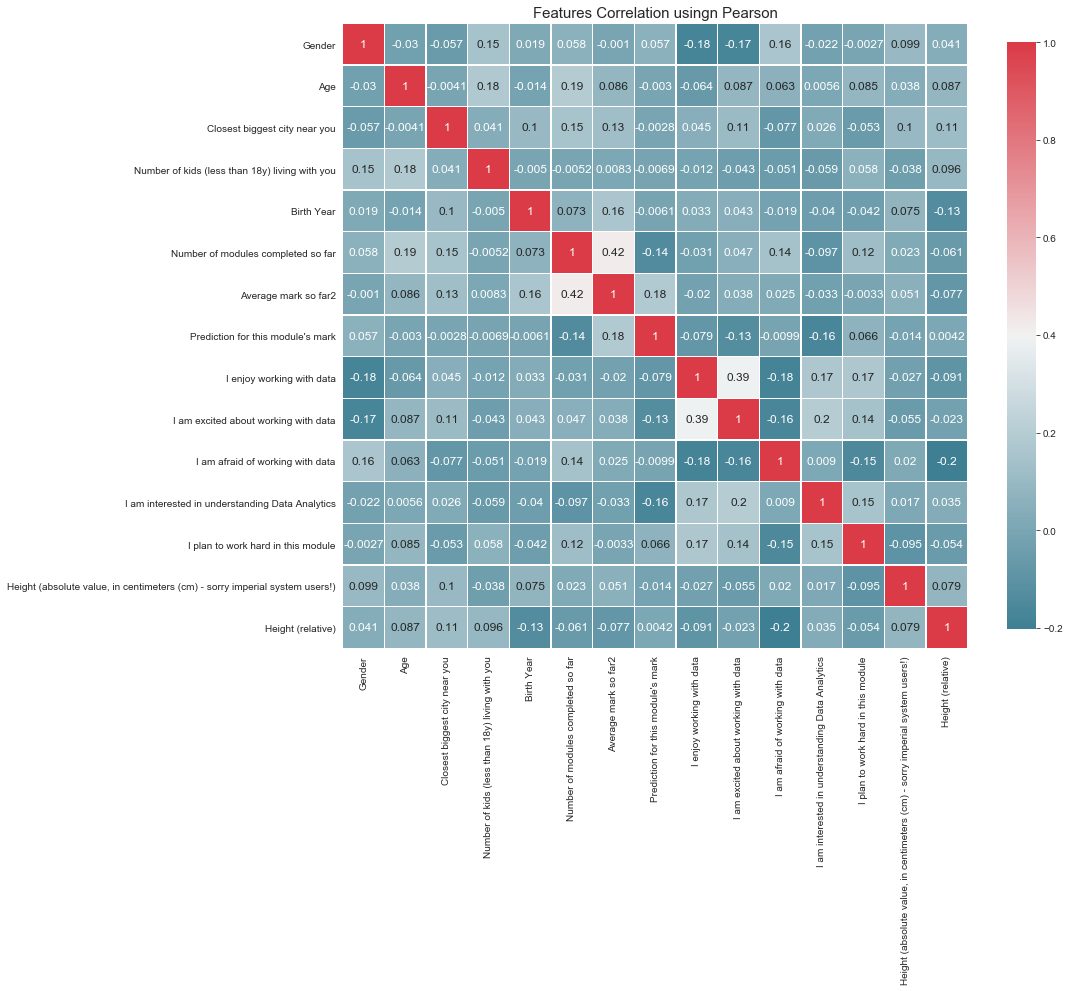

In [21]:
# Create correlation matrix of heatmap from the dataset
_ , ax = plt.subplots(figsize =(14, 12))
sns.heatmap(
    data.corr(), 
    cmap = sns.diverging_palette(220, 10, as_cmap = True),
    square=True, 
    cbar_kws={'shrink':.9 }, 
    ax=ax,
    annot=True, 
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)

plt.title('Features Correlation usingn Pearson', y=1.05, size=15)


In [48]:
### Initializating and Selecting our Machine Learning Algorithm (MLA)
wrap_MLA = [
    #xgboost
    XGBClassifier(),    
    
    svm.LinearSVC(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Gausian Linear Model
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
        
    # Trees    
    tree.ExtraTreeClassifier(),
    tree.DecisionTreeClassifier(),
    
    # Gaussian Processes
    GaussianProcessClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    
    # Nearest k Neighbor
    neighbors.KNeighborsClassifier(),

    # Ensemble
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.AdaBoostClassifier(),
]


In [50]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Train Accuracy', 'MLA Test Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [51]:
#index through MLA and save performance to table

for index, alg in enumerate(wrap_MLA):

    # fit MLA
    alg.fit(x_train, y_train)
    
    # evaluate predictions
    train_predict = alg.predict(x_train)
    test_predict = alg.predict(x_test)
    train_acc = accuracy_score(y_train, train_predict)
    test_acc = accuracy_score(y_test, test_predict)
    
    # set name and parameters
    MLA_compare.loc[index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[index, 'MLA Train Accuracy'] = train_acc
    MLA_compare.loc[index, 'MLA Test Accuracy'] = test_acc  

MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare

[05:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,MLA Name,MLA Train Accuracy,MLA Test Accuracy
3,NuSVC,0.558333,0.774194
0,XGBClassifier,1.0,0.741935
18,RandomForestClassifier,1.0,0.741935
17,GradientBoostingClassifier,1.0,0.741935
13,GaussianProcessClassifier,1.0,0.677419
20,ExtraTreesClassifier,1.0,0.677419
19,BaggingClassifier,0.966667,0.677419
16,KNeighborsClassifier,0.783333,0.677419
11,ExtraTreeClassifier,1.0,0.645161
9,SGDClassifier,0.366667,0.612903


Text(0, 0.5, 'Machine Learning Algorithm')

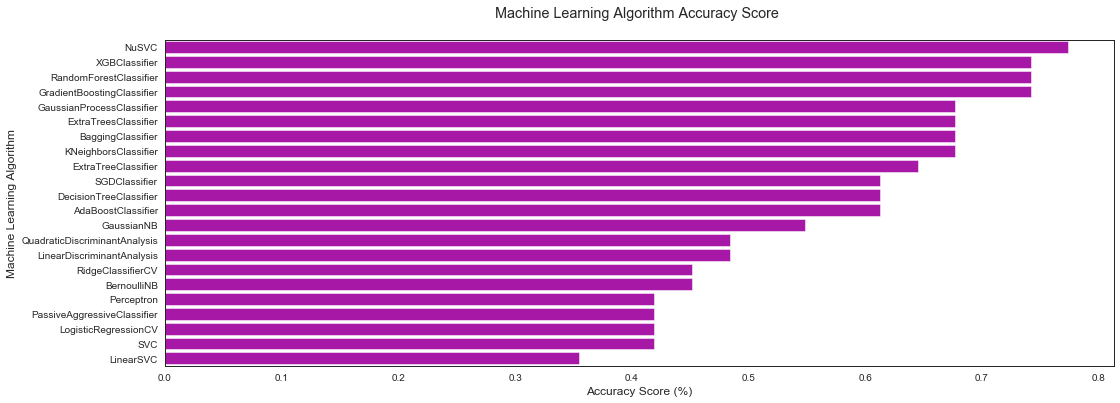

In [55]:
sns.barplot(x='MLA Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Machine Learning Algorithm')